# Self-Driving Car Engineer Nanodegree

## Project: Build a Traffic Sign Recognition Classifier

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

training_file = "traffic-signs-data/train.p" # original training set
#training_file = "augmented-data/aug_train.p" # augmented training set
validation_file= "traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

### Basic Summary of the Data Set

In [2]:
# import numpy
import numpy as np

# number of training examples
n_train = len(X_train)

#number of validation examples
n_valid = len(X_valid)

# number of testing examples
n_test = len(X_test)

# shape of a traffic sign image
image_shape = X_train[0].shape

# number of unique classes/labels in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Exploratory visualization of the dataset

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

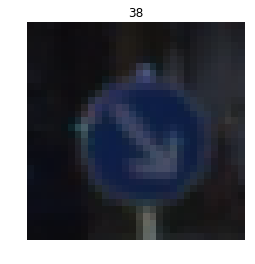

In [4]:
# Show a sample traffic sign image chosen randomly from training data
np.random.seed(123)
rand_n = np.random.randint(0, n_train)
plt.imshow(X_train[rand_n])
plt.axis("off")
plt.title(y_train[rand_n])
plt.show()

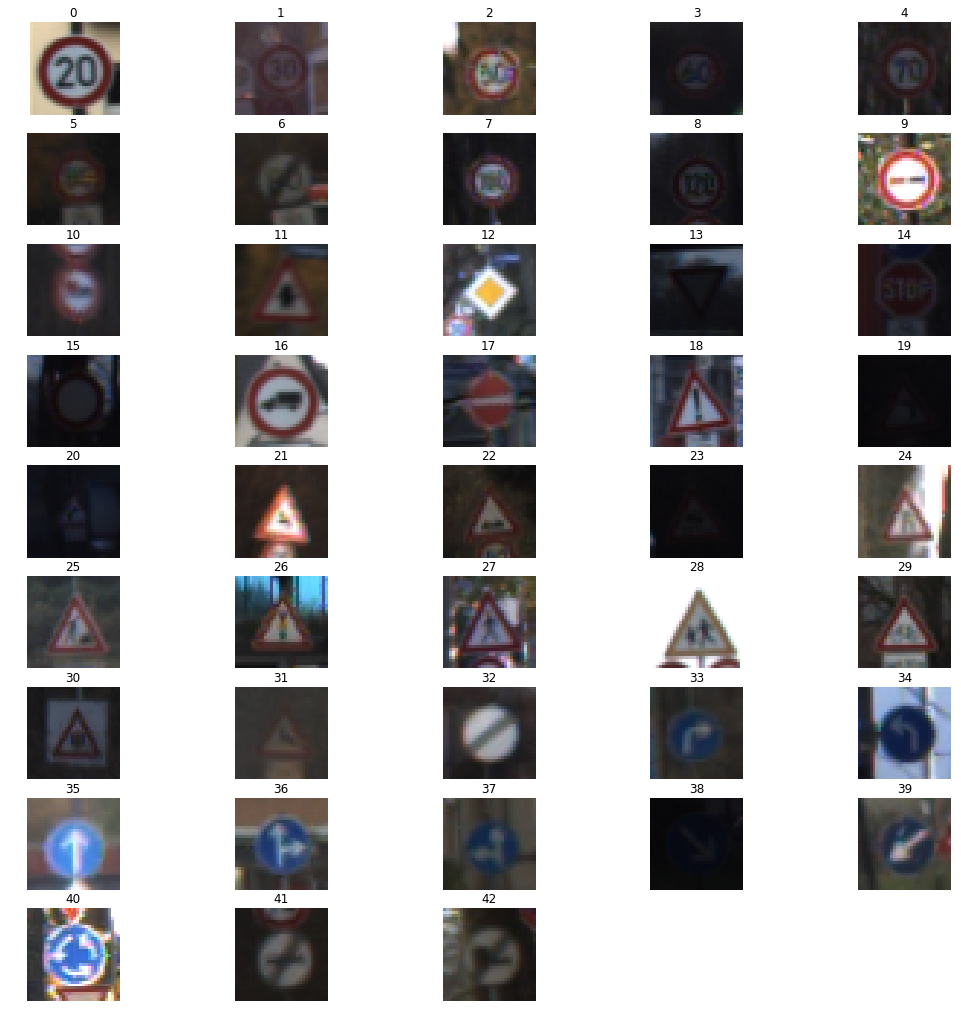

In [5]:
# Show the 43 classes of traffic signs

plt.figure(figsize= (18, 18))
for i in range(0, n_classes):
    plt.subplot(9, 5, i + 1) # set the rows and columns to show the plots
    X_selected = X_train[y_train == i]
    plt.imshow(X_selected[0,]) # show the first instance of each label
    plt.title(i)
    plt.axis("off")
plt.show()

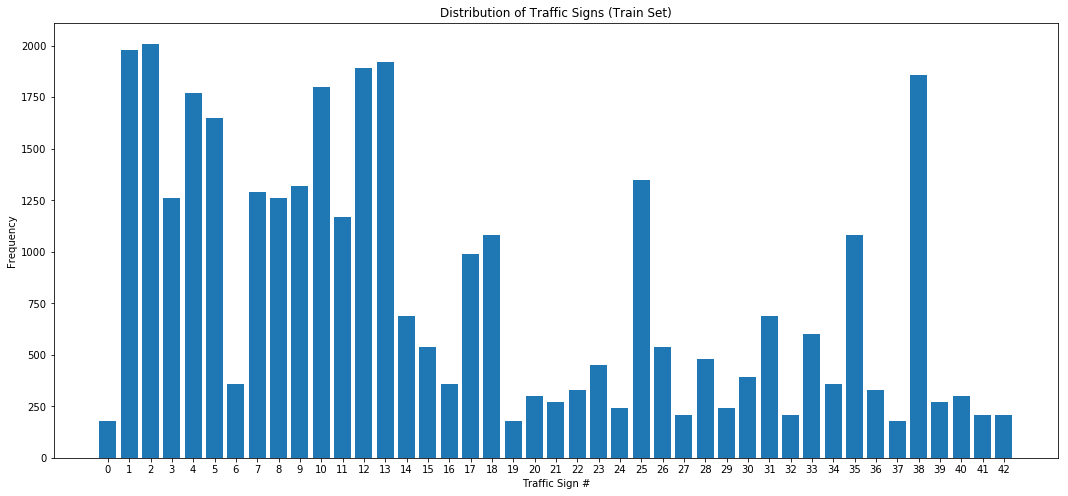

In [6]:
# Plot the histogram of traffic sign counts
unique_val, unique_count = np.unique(y_train, return_counts = True)

plt.figure(figsize=(18, 8))
plt.bar(unique_val, unique_count)
plt.title("Distribution of Traffic Signs (Train Set)")
plt.xlabel("Traffic Sign #")
plt.ylabel("Frequency")
plt.xticks(np.arange(min(y_train), max(y_train) + 1, 1))
plt.show()

### Identify classes that have relatively small data

In [7]:
### Classes with less than (low_count_limit) images
low_count_limit = 1000
unique_classes, freq_classes = np.unique(y_train, return_counts = True)
unique = dict(zip(unique_val, unique_count))
low_unique = {k: v for k, v in unique.items() if v < low_count_limit}
low_class_list = sorted(list(low_unique.keys()))
print(low_class_list)
print("Number of classes below the limit:", len(low_class_list))

[0, 6, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 39, 40, 41, 42]
Number of classes below the limit: 27


## Step 2: Data Augmentation

In [ ]:
"""
from skimage.transform import rotate
from random import randint
"""

In [ ]:
"""
%%time

# augment data to have at least (low_count_limit) images for all classes
for low_class in low_class_list:
    print(low_class, ": ", end = "")
    count_low_class = low_unique[low_class]
    class_index_list = list(np.where(y_train == low_class))
    for i in range(low_count_limit - count_low_class):
        rand_angle = randint(-15, 15)
        new_img = X_train[class_index_list[0][i % count_low_class]]
        new_img = rotate(new_img, rand_angle, mode = "edge")
        X_train = np.concatenate((X_train, [new_img]))
        y_train = np.concatenate((y_train, [low_class]))
        if i == 0:
            pass
        elif i == (low_count_limit - count_low_class - 1):
            print("|") # print if done
        elif (i/(low_count_limit - count_low_class)*100) % 10 == 0: #print progress bar for every 10% progress
            print("#", end = "")
    print()
print("Number of new images added =", len(X_train) - n_train)  
print("Number of total images =", len(X_train))
"""

In [ ]:
"""# Plot the histogram of traffic sign counts with augmented data added

unique_val, unique_count = np.unique(y_train, return_counts = True)

plt.figure(figsize=(18, 8))
plt.bar(unique_val, unique_count)
plt.title("Distribution of Traffic Signs (Train Set with augmented data)")
plt.xlabel("Traffic Sign #")
plt.ylabel("Frequency")
plt.xticks(np.arange(min(y_train), max(y_train) + 1, 1))
plt.show()
"""

In [ ]:
"""
# Save augmented training dataset for later use
aug_train = {'features': X_train,
             'labels': y_train}
pickle.dump(aug_train, open("./augmented-data/aug_train.p", "wb"))
"""

----

## Step 3: Design and Test a Model Architecture

### Pre-process the Data Set (normalization, grayscale, etc.)

In [12]:
import cv2
# function to grayscale image
def grayscale(img):
    img = np.array(img, dtype = np.float32)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_expanded = img[:, :, np.newaxis]
    return img_expanded

In [13]:
### Shuffle the training data
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [14]:
# function to run all pre-processing
def pre_process(img):
    if grayscale_img:
        img = grayscale(img)
    if normalize_img:
        img = (img - [128]) / 128
    return img

In [15]:
# set pre-processing options
grayscale_img = True
normalize_img = True

# apply pre-processing
X_train = np.array([pre_process(image) for image in X_train])
X_valid = np.array([pre_process(image) for image in X_valid])
X_test = np.array([pre_process(image) for image in X_test])

### Setup Tensorflow

In [16]:
import tensorflow as tf

EPOCHS = 80
BATCH_SIZE = 256
dropout = 0.5

### Model Architecture

In [17]:
### LeNet-5 Architecture
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1

    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    
    # Max Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Activation.
    conv1 = tf.nn.relu(conv1)
    
    # Layer 2: Convolutional. Input 14x14x6. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Layer 3: Convolutional. Input 10x10x16. Output = 6x6x64.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 64), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(64))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    
    # Dropout
    conv3 = tf.nn.dropout(conv3, keep_prob)

    # Max Pooling. Input = 6x6x64. Output = 3x3x64.
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Activation.
    conv3 = tf.nn.relu(conv3)

    # Flatten. Input = 3x3x64. Output = 576.
    fc0   = flatten(conv3)

    # Layer 4: Fully Connected. Input = 576. Output = 240.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(576, 240), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(240))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Dropout
    fc1 = tf.nn.dropout(fc1, keep_prob)
    
    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 5: Fully Connected. Input = 240. Output = 168.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(240, 168), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(168))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    # Activation.
    fc2    = tf.nn.relu(fc2)
    
    # Layer 6: Fully Connected. Input = 168. Output = 84.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(168, 84), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(84))
    fc3    = tf.matmul(fc2, fc3_W) + fc3_b
    
    # Dropout
    fc3 = tf.nn.dropout(fc3, keep_prob)
    
    # Activation.
    fc3    = tf.nn.relu(fc3)

    # Layer 7: Fully Connected. Input = 84. Output = 43.
    fc4_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc4_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc3, fc4_W) + fc4_b

    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

### Features and Labels

In [18]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1)) # placeholder for a batch of input images
y = tf.placeholder(tf.int32, (None)) # placeholder for a batch of output labels
keep_prob = tf.placeholder(tf.float32) # placeholder for dropout
one_hot_y = tf.one_hot(y, 43)

### Training Pipeline

In [19]:
rate = 0.0005

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

### Model Evaluation

In [20]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset + BATCH_SIZE], y_data[offset:offset + BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y , keep_prob: 1.})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Training Model

Training...

EPOCH 1 ...
Validation Accuracy = 0.225

EPOCH 2 ...
Validation Accuracy = 0.490

EPOCH 3 ...
Validation Accuracy = 0.622

EPOCH 4 ...
Validation Accuracy = 0.759

EPOCH 5 ...
Validation Accuracy = 0.811

EPOCH 6 ...
Validation Accuracy = 0.836

EPOCH 7 ...
Validation Accuracy = 0.844

EPOCH 8 ...
Validation Accuracy = 0.859

EPOCH 9 ...
Validation Accuracy = 0.861

EPOCH 10 ...
Validation Accuracy = 0.876

EPOCH 11 ...
Validation Accuracy = 0.892

EPOCH 12 ...
Validation Accuracy = 0.900

EPOCH 13 ...
Validation Accuracy = 0.904

EPOCH 14 ...
Validation Accuracy = 0.909

EPOCH 15 ...
Validation Accuracy = 0.910

EPOCH 16 ...
Validation Accuracy = 0.913

EPOCH 17 ...
Validation Accuracy = 0.924

EPOCH 18 ...
Validation Accuracy = 0.918

EPOCH 19 ...
Validation Accuracy = 0.930

EPOCH 20 ...
Validation Accuracy = 0.938

EPOCH 21 ...
Validation Accuracy = 0.939

EPOCH 22 ...
Validation Accuracy = 0.936

EPOCH 23 ...
Validation Accuracy = 0.943

EPOCH 24 ...
Validation Accura

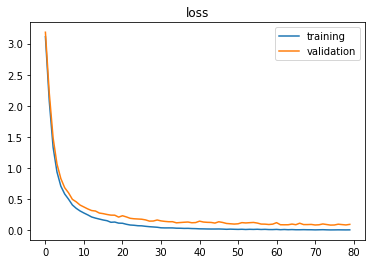

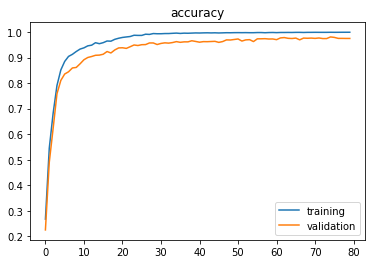

Model saved
Wall time: 6min 34s


In [21]:
%%time
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    train_loss_list = []
    valid_loss_list = []
    train_acc_list = []
    valid_acc_list = []
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train) # shuffle training set before each epcoh
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: dropout})
        
        # code to show loss plot
        train_loss = sess.run(loss_operation, feed_dict={x: X_train, y: y_train, keep_prob: 1.})
        valid_loss = sess.run(loss_operation, feed_dict={x: X_valid, y: y_valid, keep_prob: 1.})
        train_loss_list.append(train_loss)
        valid_loss_list.append(valid_loss)
        
        # code to show accuracy plot
        training_accuracy = evaluate(X_train, y_train)
        train_acc_list.append(training_accuracy)
        validation_accuracy = evaluate(X_valid, y_valid) # measure the loss and accuracy of the validation set after each epoch
        valid_acc_list.append(validation_accuracy)
        
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    
    print()
    print("Epoch:", EPOCHS, "Batch:", BATCH_SIZE, "Dropout:", dropout, "Rate:", rate)

    # show loss plot
    plt.plot(train_loss_list, label="training")
    plt.plot(valid_loss_list, label="validation")
    plt.legend()
    plt.title("loss")
    plt.show()

    # show accuracy plot
    plt.plot(train_acc_list, label="training")
    plt.plot(valid_acc_list, label="validation")
    plt.legend()
    plt.title("accuracy")
    plt.show()
    
    saver.save(sess, './lenet') # save the model after training
    print("Model saved")

### Testing Model 

In [22]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.954


---

## Step 4: Test a Model on New Images
Predicting the traffic sign type of German traffic signs downloaded from the web

### Load and Output the Images

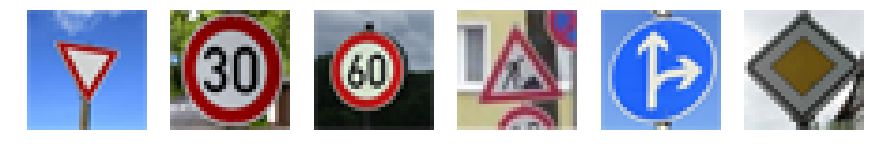

In [23]:
import os
new_signs = []
plt.figure(figsize= (15, 15))

for i, filename in enumerate(os.listdir("new-signs/")):
    sign = cv2.imread("new-signs/" + filename)
    sign = cv2.cvtColor(sign, cv2.COLOR_BGR2RGB)
    new_signs.append(sign)
    plt.subplot(1, 6, i+1)
    plt.axis("off")
    plt.imshow(sign, cmap = "gray")
plt.show()

### Predict the Sign Type for Each Image

In [24]:
# Prepare images for prediction
new_signs = np.asarray(new_signs)
new_signs_gray = np.array([pre_process(sign) for sign in new_signs]) # pre-process new signs
new_signs_class = [13, 1, 3, 25, 36, 12] # label new signs
new_signs_class = np.asarray(new_signs_class)
print(new_signs_gray.shape)
print(new_signs_class.shape)

(6, 32, 32, 1)
(6,)


### Analyze Performance

In [25]:
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=5)

with tf.Session() as sess:
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")

    test_accuracy = evaluate(new_signs_gray, new_signs_class)
    new_softmax_logits = sess.run(softmax_logits, feed_dict={x: new_signs_gray, keep_prob: 1.0})
    new_top_k = sess.run(top_k, feed_dict={x: new_signs_gray, keep_prob: 1.0})
    print("Test Accuracy = {:.2f}%".format(test_accuracy * 100))

Test Accuracy = 100.00%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

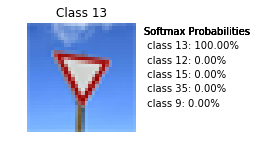

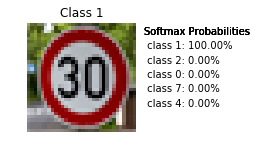

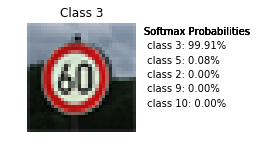

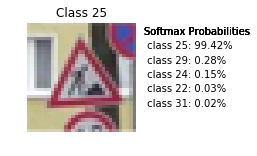

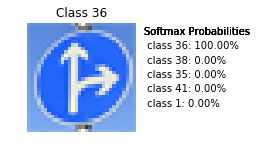

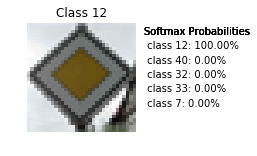

In [26]:
for i, sign in enumerate(new_signs):
    plt.figure(figsize= (2, 2))
    plt.axis('off')
    plt.title("Class {}".format(new_signs_class[i]))
    plt.imshow(new_signs[i].squeeze(), cmap = "gray")
    for j, k in enumerate(np.linspace(0.7, 0.3, 5)):
        plt.figtext(0.95, 0.8, "Softmax Probabilities")
        plt.figtext(0.95, k," class {}: {:.2f}%".format((new_top_k[1][i][j]), (new_top_k[0][i][j])*100))

    plt.show()